In [ ]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.2 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
drivepath = "escooter2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)
gdf

,ID,All_D_0,All_D_1,All_D_2,All_D_3,All_D_4,All_D_5,All_D_6,All_D_7,All_D_8,...,Fa_Y_15,Fa_Y_16,Fa_Y_17,Fa_Y_18,Fa_Y_19,Fa_Y_20,Fa_Y_21,Fa_Y_22,Fa_Y_23,geometry
0,0f793e66-8d77-4e16-a107-d3d568a27acc,4,0,7,2,1,0,0,3,3,...,3,4,7,7,1,2,3,3,1,"LINESTRING Z (397105.011 146144.556 0, 397094...."
1,7631f185-11b2-4156-86d0-51e30c0529b3,880,927,733,323,113,73,94,196,339,...,732,842,1236,979,722,648,569,507,400,"LINESTRING Z (396929.591 137710.495 0, 396929...."
2,33953615-3f45-4eb3-a86e-117f05ca5c68,32,23,25,7,5,1,11,6,10,...,68,65,52,49,37,28,25,22,26,"LINESTRING Z (396634.181 140701.755 0, 396634...."
3,8043f7dd-40ff-4361-a30e-7936cc016ee6,1,2,3,3,2,0,0,0,1,...,3,6,10,9,3,1,1,3,0,"LINESTRING Z (391818.71 139157.575 0, 391818.7..."
4,e3c77d11-4c00-4ada-a36f-80facacd379e,1,0,1,2,1,0,0,1,0,...,1,4,3,2,0,0,0,0,0,"LINESTRING Z (396852.843 146890.302 0, 396853...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,f6d5bde1-ddf5-4e95-b9d2-837b0f461167,33,31,29,30,22,30,29,16,42,...,68,79,66,51,68,55,51,55,70,"LINESTRING Z (402463.222 133927.184 0, 402445...."
13813,74be63ab-5128-44da-8268-0ab54a2787b6,3,2,0,2,1,2,3,0,2,...,6,17,4,14,9,4,5,10,10,"LINESTRING Z (403428.453 132666.934 0, 403437...."
13814,d1fb135f-e7e3-4171-bec7-13e78a6c0007,0,1,0,1,1,0,2,1,1,...,3,1,2,0,2,1,3,0,0,"LINESTRING Z (400032.062 128534.903 0, 400049...."
13815,7cf6a1fa-d208-4e58-bf7e-22ea76184b08,310,224,160,76,47,67,90,141,149,...,449,522,518,586,464,369,371,357,216,"LINESTRING Z (398472.107 134293.336 0, 398474...."


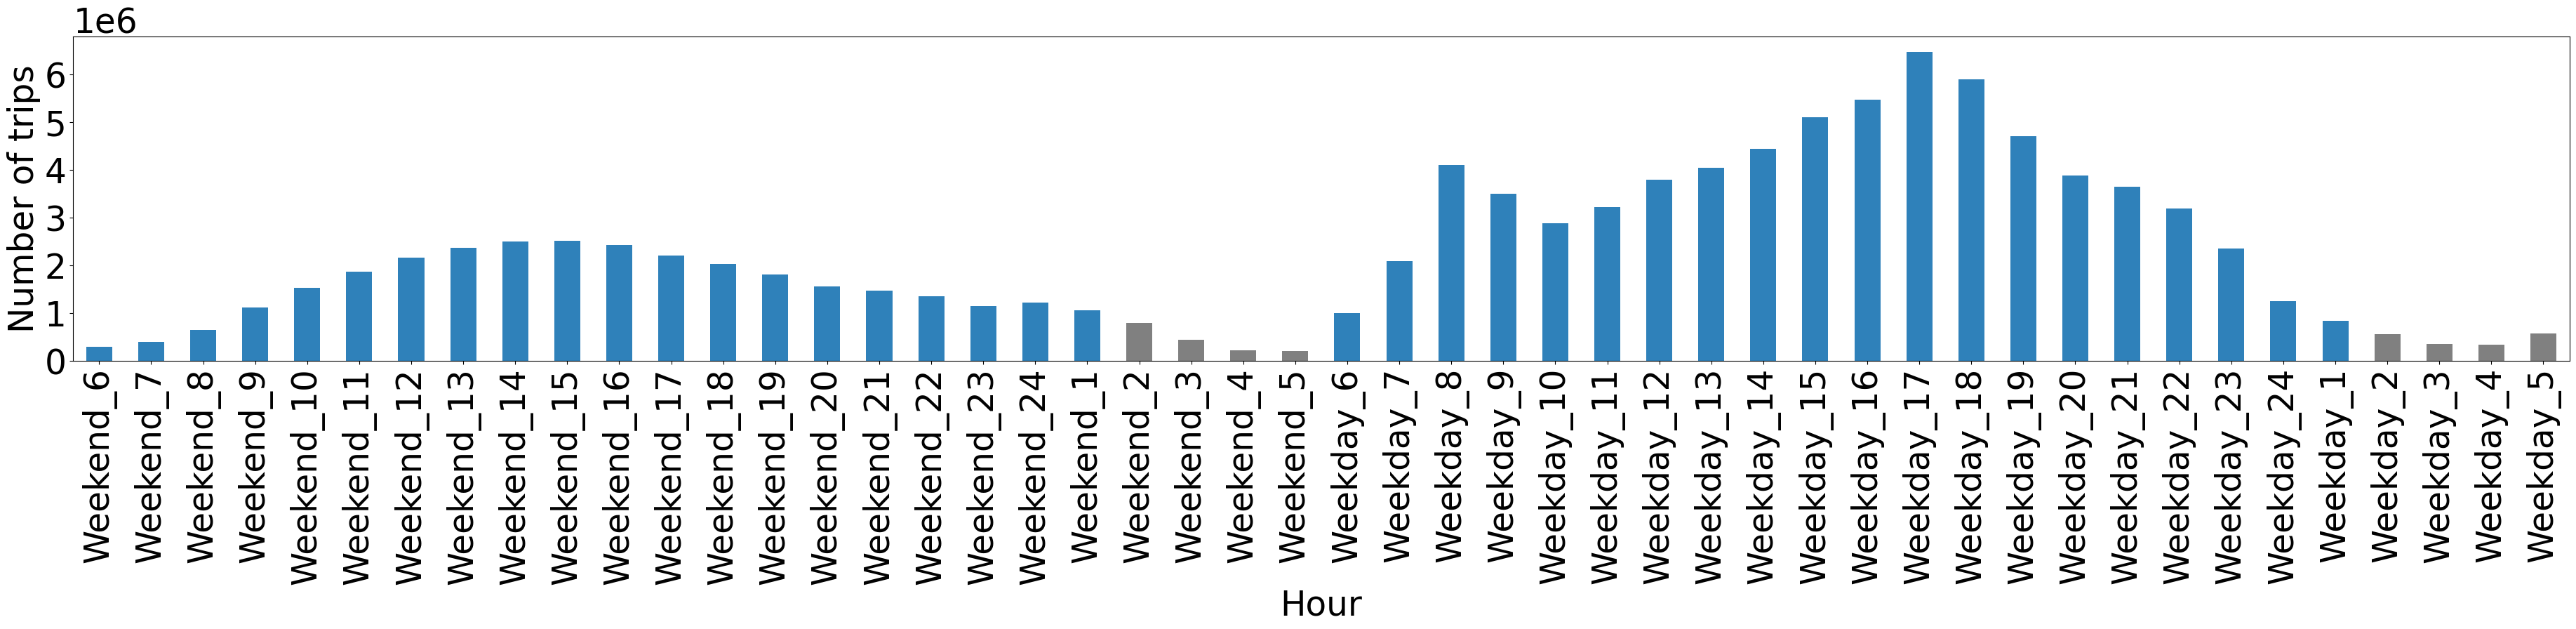

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns = [
    'All_D_6', 'All_D_7', 'All_D_8', 'All_D_9',
    'All_D_10', 'All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15', 'All_D_16', 'All_D_17', 'All_D_18', 'All_D_19',
    'All_D_20', 'All_D_21', 'All_D_22', 'All_D_23',  'All_D_0','All_D_1', 'All_D_2', 'All_D_3', 'All_D_4', 'All_D_5',
    'All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10', 'All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15',
    'All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20', 'All_Y_21', 'All_Y_22', 'All_Y_23','All_Y_0','All_Y_1', 'All_Y_2', 'All_Y_3', 'All_Y_4', 'All_Y_5'
]

sums = gdf[columns].sum()


gray_columns = [
    'All_D_2', 'All_D_3', 'All_D_4','All_D_5', 'All_Y_2', 'All_Y_3', 'All_Y_4','All_Y_5'
]


colors = ['gray' if col in gray_columns else '#2f81ba' for col in columns]


new_labels = ['Weekend_6', 'Weekend_7', 'Weekend_8', 'Weekend_9', 'Weekend_10', 'Weekend_11', 'Weekend_12',
              'Weekend_13', 'Weekend_14', 'Weekend_15', 'Weekend_16', 'Weekend_17', 'Weekend_18', 'Weekend_19',
              'Weekend_20', 'Weekend_21', 'Weekend_22', 'Weekend_23', 'Weekend_24', 'Weekend_1', 'Weekend_2',
              'Weekend_3', 'Weekend_4', 'Weekend_5',
              'Weekday_6', 'Weekday_7', 'Weekday_8', 'Weekday_9', 'Weekday_10', 'Weekday_11', 'Weekday_12',
              'Weekday_13', 'Weekday_14', 'Weekday_15', 'Weekday_16', 'Weekday_17', 'Weekday_18', 'Weekday_19',
              'Weekday_20', 'Weekday_21', 'Weekday_22', 'Weekday_23', 'Weekday_24', 'Weekday_1', 'Weekday_2',
              'Weekday_3', 'Weekday_4', 'Weekday_5']


fig, ax = plt.subplots(figsize=(45.9, 6))
sums.plot(kind='bar', color=colors, ax=ax)


plt.xlabel('Hour', fontsize=35)
plt.ylabel('Number of trips', fontsize=35)


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


ax.set_xticklabels(new_labels, rotation=90)

ax.yaxis.get_offset_text().set_fontsize(35)

plt.show()


In [ ]:
drivepath = "limebike2023_trajectory_hourly_count.shp"
gdf2 = gpd.read_file(drivepath)

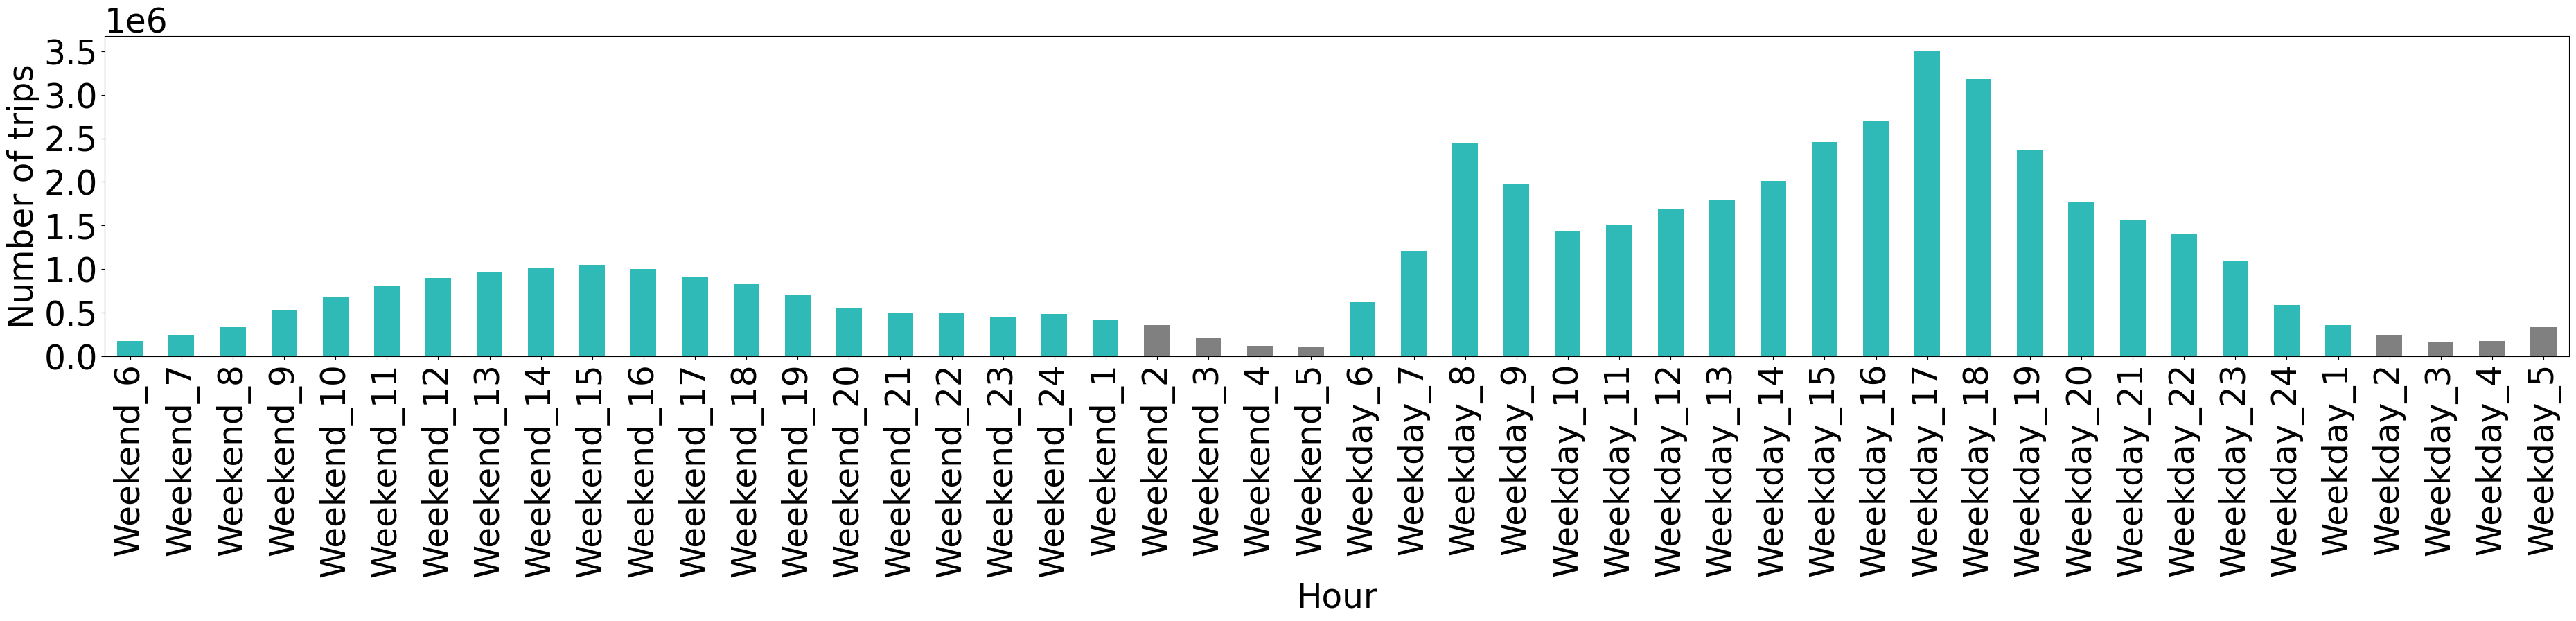

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns = [
    'All_D_6', 'All_D_7', 'All_D_8', 'All_D_9',
    'All_D_10', 'All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15', 'All_D_16', 'All_D_17', 'All_D_18', 'All_D_19',
    'All_D_20', 'All_D_21', 'All_D_22', 'All_D_23',  'All_D_0','All_D_1', 'All_D_2', 'All_D_3', 'All_D_4', 'All_D_5',
    'All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10', 'All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15',
    'All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20', 'All_Y_21', 'All_Y_22', 'All_Y_23','All_Y_0','All_Y_1', 'All_Y_2', 'All_Y_3', 'All_Y_4', 'All_Y_5'
]


sums = gdf2[columns].sum()


gray_columns = [
    'All_D_2', 'All_D_3', 'All_D_4','All_D_5', 'All_Y_2', 'All_Y_3', 'All_Y_4','All_Y_5'
]


colors = ['gray' if col in gray_columns else '#2fbab8' for col in columns]

new_labels = ['Weekend_6', 'Weekend_7', 'Weekend_8', 'Weekend_9', 'Weekend_10', 'Weekend_11', 'Weekend_12',
              'Weekend_13', 'Weekend_14', 'Weekend_15', 'Weekend_16', 'Weekend_17', 'Weekend_18', 'Weekend_19',
              'Weekend_20', 'Weekend_21', 'Weekend_22', 'Weekend_23', 'Weekend_24', 'Weekend_1', 'Weekend_2',
              'Weekend_3', 'Weekend_4', 'Weekend_5',
              'Weekday_6', 'Weekday_7', 'Weekday_8', 'Weekday_9', 'Weekday_10', 'Weekday_11', 'Weekday_12',
              'Weekday_13', 'Weekday_14', 'Weekday_15', 'Weekday_16', 'Weekday_17', 'Weekday_18', 'Weekday_19',
              'Weekday_20', 'Weekday_21', 'Weekday_22', 'Weekday_23', 'Weekday_24', 'Weekday_1', 'Weekday_2',
              'Weekday_3', 'Weekday_4', 'Weekday_5']


fig, ax = plt.subplots(figsize=(45.9, 6))
sums.plot(kind='bar', color=colors, ax=ax)


ax.set_xticklabels(new_labels, rotation=90)


plt.xlabel('Hour', fontsize=35)
plt.ylabel('Number of trips', fontsize=35)


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))


ax.yaxis.get_offset_text().set_fontsize(35)

plt.show()

In [ ]:
drivepath = "strava2023_trajectory_hourly_count.shp"
gdf3 = gpd.read_file(drivepath)

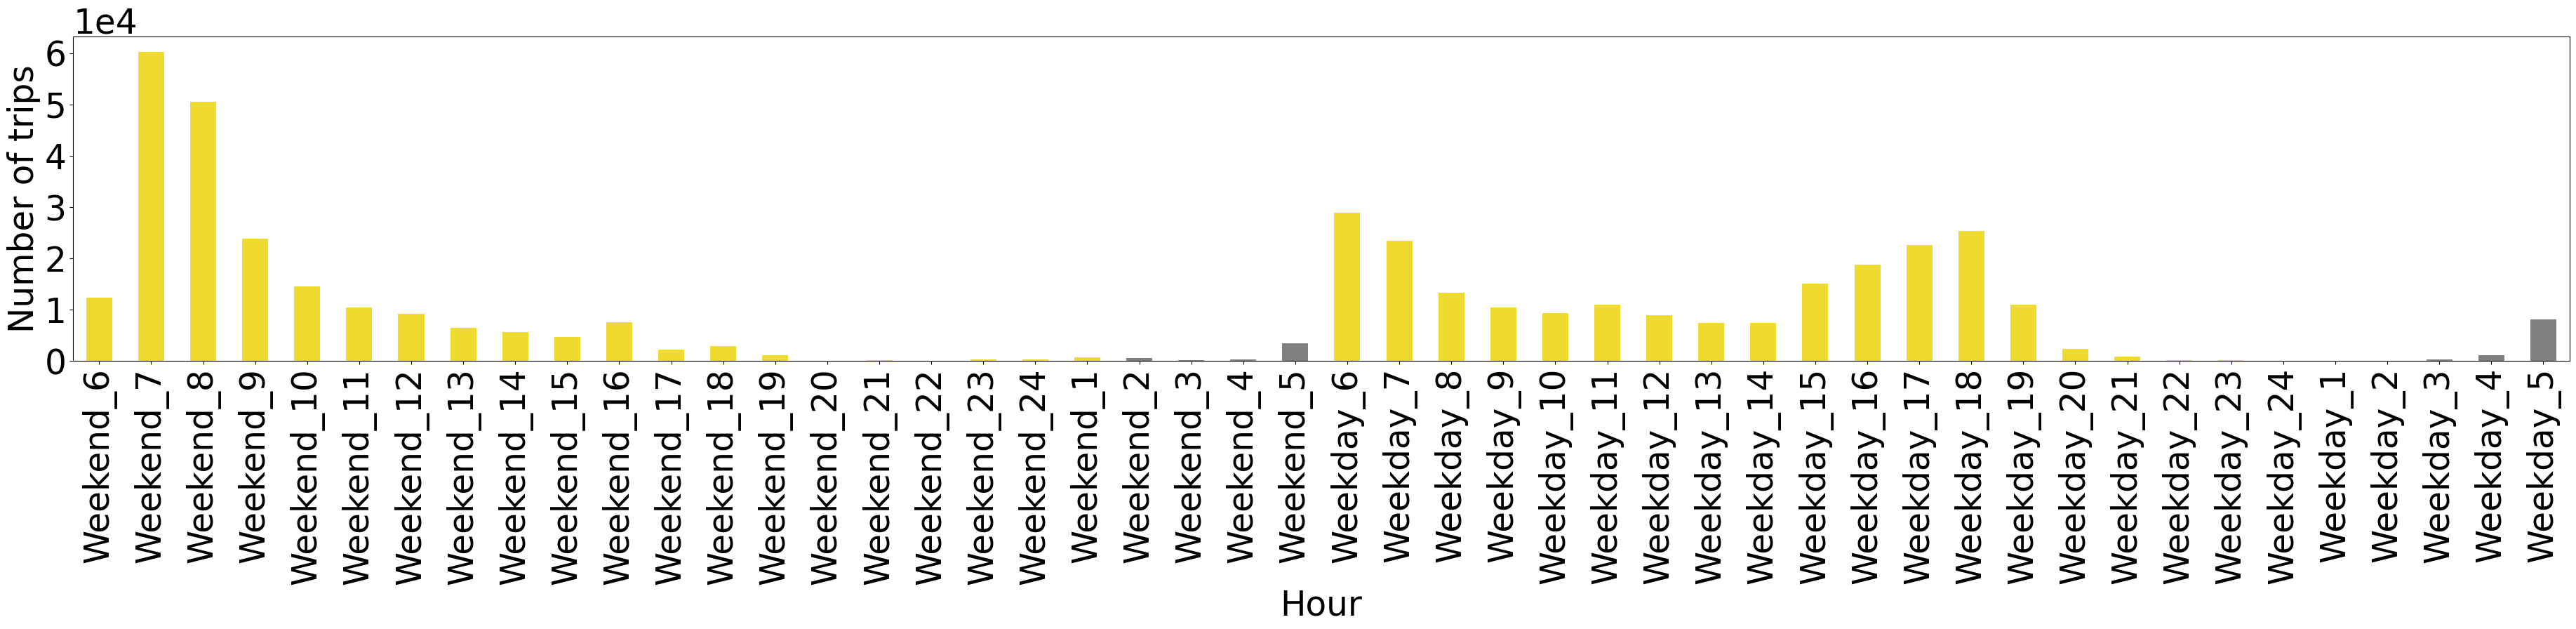

In [ ]:
columns = [
    'All_D_6', 'All_D_7', 'All_D_8', 'All_D_9',
    'All_D_10', 'All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15', 'All_D_16', 'All_D_17', 'All_D_18', 'All_D_19',
    'All_D_20', 'All_D_21', 'All_D_22', 'All_D_23',  'All_D_0','All_D_1', 'All_D_2', 'All_D_3', 'All_D_4', 'All_D_5',
    'All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10', 'All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15',
    'All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20', 'All_Y_21', 'All_Y_22', 'All_Y_23','All_Y_0','All_Y_1', 'All_Y_2', 'All_Y_3', 'All_Y_4', 'All_Y_5'
]

# 计算每列的总和
sums = gdf3[columns].sum()

# 定义2am到5am的列名
gray_columns = [
    'All_D_2', 'All_D_3', 'All_D_4','All_D_5', 'All_Y_2', 'All_Y_3', 'All_Y_4','All_Y_5'
]


colors = ['gray' if col in gray_columns else '#efdb2f' for col in columns]


new_labels = ['Weekend_6', 'Weekend_7', 'Weekend_8', 'Weekend_9', 'Weekend_10', 'Weekend_11', 'Weekend_12',
              'Weekend_13', 'Weekend_14', 'Weekend_15', 'Weekend_16', 'Weekend_17', 'Weekend_18', 'Weekend_19',
              'Weekend_20', 'Weekend_21', 'Weekend_22', 'Weekend_23', 'Weekend_24', 'Weekend_1', 'Weekend_2',
              'Weekend_3', 'Weekend_4', 'Weekend_5',
              'Weekday_6', 'Weekday_7', 'Weekday_8', 'Weekday_9', 'Weekday_10', 'Weekday_11', 'Weekday_12',
              'Weekday_13', 'Weekday_14', 'Weekday_15', 'Weekday_16', 'Weekday_17', 'Weekday_18', 'Weekday_19',
              'Weekday_20', 'Weekday_21', 'Weekday_22', 'Weekday_23', 'Weekday_24', 'Weekday_1', 'Weekday_2',
              'Weekday_3', 'Weekday_4', 'Weekday_5']


fig, ax = plt.subplots(figsize=(45.9, 6))
sums.plot(kind='bar', color=colors, ax=ax)


plt.xlabel('Hour', fontsize=35)
plt.ylabel('Number of trips', fontsize=35)


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)


ax.set_xticklabels(new_labels, rotation=90)


ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))


ax.yaxis.get_offset_text().set_fontsize(35)

plt.show()


In [ ]:
drivepath = "capitalbike2023_trajectory_hourly_count.shp"
gdf4 = gpd.read_file(drivepath)

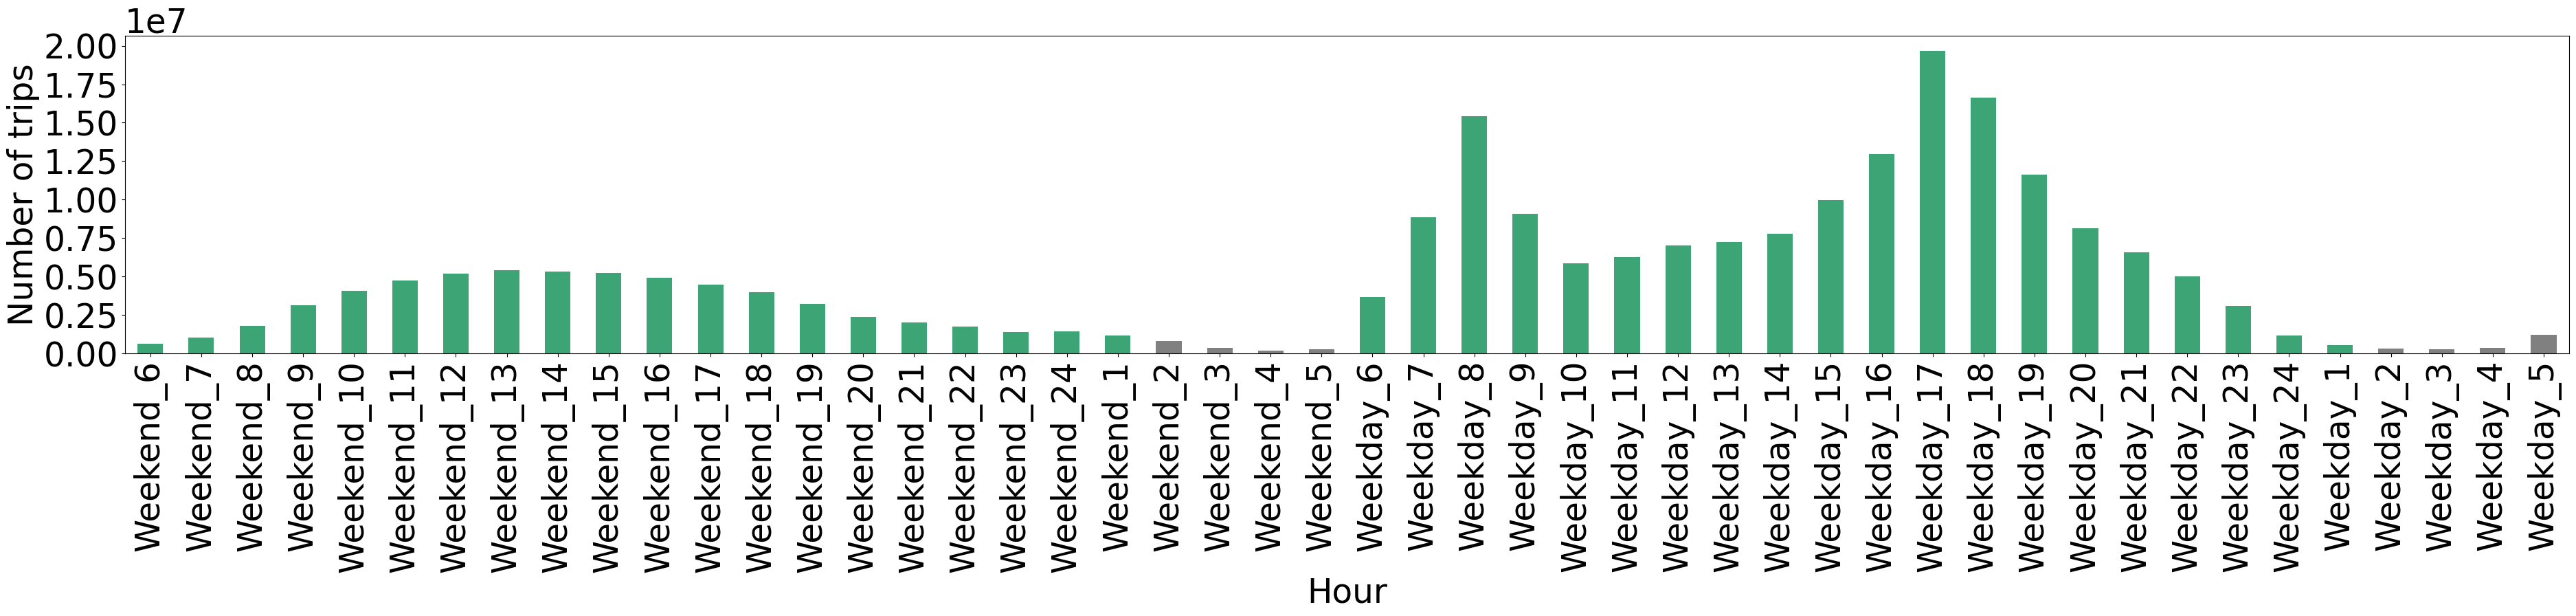

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

columns = [
    'All_D_6', 'All_D_7', 'All_D_8', 'All_D_9',
    'All_D_10', 'All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15', 'All_D_16', 'All_D_17', 'All_D_18', 'All_D_19',
    'All_D_20', 'All_D_21', 'All_D_22', 'All_D_23',  'All_D_0','All_D_1', 'All_D_2', 'All_D_3', 'All_D_4', 'All_D_5',
    'All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10', 'All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15',
    'All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20', 'All_Y_21', 'All_Y_22', 'All_Y_23','All_Y_0','All_Y_1', 'All_Y_2', 'All_Y_3', 'All_Y_4', 'All_Y_5'
]


sums = gdf4[columns].sum()


gray_columns = [
    'All_D_2', 'All_D_3', 'All_D_4','All_D_5', 'All_Y_2', 'All_Y_3', 'All_Y_4','All_Y_5'
]


colors = ['gray' if col in gray_columns else '#3da575' for col in columns]


new_labels = ['Weekend_6', 'Weekend_7', 'Weekend_8', 'Weekend_9', 'Weekend_10', 'Weekend_11', 'Weekend_12',
              'Weekend_13', 'Weekend_14', 'Weekend_15', 'Weekend_16', 'Weekend_17', 'Weekend_18', 'Weekend_19',
              'Weekend_20', 'Weekend_21', 'Weekend_22', 'Weekend_23', 'Weekend_24', 'Weekend_1', 'Weekend_2',
              'Weekend_3', 'Weekend_4', 'Weekend_5',
              'Weekday_6', 'Weekday_7', 'Weekday_8', 'Weekday_9', 'Weekday_10', 'Weekday_11', 'Weekday_12',
              'Weekday_13', 'Weekday_14', 'Weekday_15', 'Weekday_16', 'Weekday_17', 'Weekday_18', 'Weekday_19',
              'Weekday_20', 'Weekday_21', 'Weekday_22', 'Weekday_23', 'Weekday_24', 'Weekday_1', 'Weekday_2',
              'Weekday_3', 'Weekday_4', 'Weekday_5']


fig, ax = plt.subplots(figsize=(45.9, 6))
sums.plot(kind='bar', color=colors, ax=ax)


plt.xlabel('Hour', fontsize=35)
plt.ylabel('Number of trips', fontsize=35)


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

ax.set_xticklabels(new_labels, rotation=90)

ax.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))


ax.yaxis.get_offset_text().set_fontsize(35)

plt.show()